# 1. Importing the Dataset

### Installing the Kaggle datasets

In [ ]:
!pip install -q kaggle 

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jalilbou","key":"2ad8f3a0dff986091b51a74a45228d6c"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 /root/.kaggle/kaggle.json/

chmod: cannot access '/root/.kaggle/kaggle.json/': Not a directory


In [ ]:
! kaggle datasets list

ref                                                           title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                             9MB  2023-03-20 15:43:25           1982         82  1.0              
dgoenrique/netflix-movies-and-tv-shows                        Netflix Movies and TV Shows                     2MB  2023-03-13 18:49:00           1356         38  1.0              
rajkumarpandey02/list-of-countries-by-gdp-sector-composition  List of Countries by GDP Sector Composition     8KB  2023-03-20 04:42:10           1283         44  1.0              
datascientistanna/customers-dataset                           Shop Customer Data                    

### Importing the Flowers Recognition dataset file

In [ ]:
! kaggle datasets download -d alxmamaev/flowers-recognition

 95% 214M/225M [00:01<00:00, 201MB/s]
100% 225M/225M [00:01<00:00, 166MB/s]


### Unzipping the file

In [ ]:
!unzip flowers-recognition.zip

# 2. Preparing and splitting the Data

### Creating a suitable dataset

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import pickle

In [ ]:
data_dir = 'flowers'

In [ ]:
categories = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
data = []
def make_data():
  for category in categories :
    path = os.path.join(data_dir, category)
    label = categories.index(category)
    for img_name in os.listdir(path):
      image_path = os.path.join(path, img_name)
      image = cv2.imread(image_path)
      try:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224,224))
        image = np.array(image, dtype=np.float32)

        data.append([image, label])
      except Exception as e :
        pass
  print(len(data))
  pik = open('flowers_dataset', 'wb')
  pickle.dump(data,pik)
  pik.close()

In [ ]:
make_data()

4317


In [ ]:
def load_data():
  pick = open('flowers_dataset','rb')
  data = pickle.load(pick)

  np.random.shuffle(data)

  features = []
  labels = []

  for img, label in data:
    features.append(img)
    labels.append(label)
  features = np.array(features, dtype = np.float32)
  labels = np.array(labels)

  features = features/255

  return [features, labels]

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

### Splitting to Feateures and Labels

In [ ]:
X, y = load_data()

### Splitting to train and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=19, test_size = 0.2)

In [ ]:
X.shape, x_train.shape, x_test.shape

((4317, 224, 224, 3), (3453, 224, 224, 3), (864, 224, 224, 3))

# 3. Building the CNN Model

### Build, Compile, and Fit the model

In [ ]:
# 1. build the model

model = tf.keras.Sequential([
    tf.keras.layers.Input([224,224,3]),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size= 2 , strides=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),  strides=1, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# 2. compile the model

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy']
              )

# 3. fit the model

hist = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
108/108 [==============================] - 18s 46ms/step - loss: 1.3714 - accuracy: 0.4127
Epoch 2/20
108/108 [==============================] - 5s 44ms/step - loss: 1.0749 - accuracy: 0.5737
Epoch 3/20
108/108 [==============================] - 4s 41ms/step - loss: 0.8624 - accuracy: 0.6722
Epoch 4/20
108/108 [==============================] - 5s 43ms/step - loss: 0.6534 - accuracy: 0.7567
Epoch 5/20
108/108 [==============================] - 5s 43ms/step - loss: 0.4170 - accuracy: 0.8526
Epoch 6/20
108/108 [==============================] - 4s 41ms/step - loss: 0.2358 - accuracy: 0.9204
Epoch 7/20
108/108 [==============================] - 5s 43ms/step - loss: 0.1493 - accuracy: 0.9545
Epoch 8/20
108/108 [==============================] - 5s 42ms/step - loss: 0.0900 - accuracy: 0.9748
Epoch 9/20
108/108 [==============================] - 5s 42ms/step - loss: 0.0664 - accuracy: 0.9823
Epoch 10/20
108/108 [==============================] - 5s 43ms/step - loss: 0.0643 - accur

### summary on the architecture

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 16)        9232      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 16)       0

### Save the model

In [ ]:
# save the model

model.save('flowers_model.h5')

### Reload the model

In [ ]:
# reload the model

from tensorflow.keras.models import load_model
flowers_model = load_model('flowers_model.h5')

# 4. Evaluate the Model's Performance


### Plotting the performance

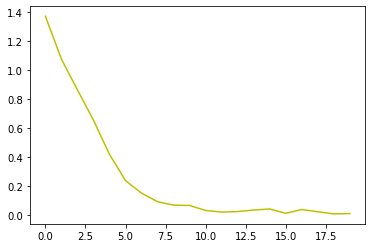

In [ ]:
# plot the loss

plt.figure()
plt.plot(hist.history['loss'], color= 'y')
plt.show()

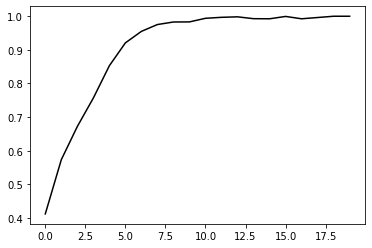

In [ ]:
# plot the accuracy

plt.figure()
plt.plot(hist.history['accuracy'], color='k')
plt.show()

### Checking the score on the both train & test data

In [ ]:
# evaluating on the train data
flowers_model.evaluate(x_train, y_train)

108/108 [==============================] - 3s 20ms/step - loss: 0.5527 - accuracy: 0.9221


[0.5527110695838928, 0.9220967292785645]

In [ ]:
# evaluating on the test data
flowers_model.evaluate(x_test, y_test)

27/27 [==============================] - 1s 22ms/step - loss: 0.4733 - accuracy: 0.9282


[0.47333940863609314, 0.9282407164573669]

In [ ]:
# make prediction
y_pred = flowers_model.predict(x_train)


108/108 [==============================] - 10s 19ms/step


# 5. Test the Model

### Import a flower image

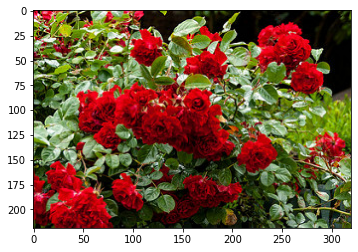

In [ ]:
import cv2 

img = cv2.imread('rosa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### Reshaping the picture

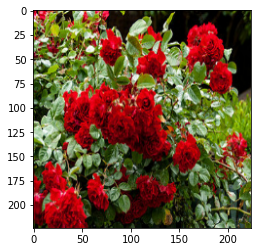

In [ ]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))

### Making the prediction

In [ ]:
yhat = flowers_model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 8s 8s/step


array([[5.58970089e-04, 2.39241942e-11, 9.99401331e-01, 1.26324385e-11,
        3.97253134e-05]], dtype=float32)

By knowing the order of the flowers types as ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'],

 we can say that the model has succesfully predicted the classe of this image (3rd prediction probapility in the array : 9.994..) which is a ROSE !